In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [4]:
# Define tickers symbols
tickerSymbols = ['MSFT', 'TSLA', 'AAPL', 'AMZN', 'GOOG', 'AMC']
start_year = '2015-1-1'
end_year = '2020-1-1'

# Get the data on these tickers
MSFT = yf.Ticker(tickerSymbols[0])
TSLA = yf.Ticker(tickerSymbols[1])
AAPL = yf.Ticker(tickerSymbols[2])
AMZN = yf.Ticker(tickerSymbols[3])
GOOG = yf.Ticker(tickerSymbols[4])
AMC = yf.Ticker(tickerSymbols[5])

# Get the historical prices for the tickers
MSFT_df = MSFT.history(period='1d', start=start_year, end=end_year)
TSLA_df = TSLA.history(period='1d', start=start_year, end=end_year)
AAPL_df = AAPL.history(period='1d', start=start_year, end=end_year)
AMZN_df = AMZN.history(period='1d', start=start_year, end=end_year)
GOOG_df = GOOG.history(period='1d', start=start_year, end=end_year)
AMC_df = GOOG.history(period='1d', start=start_year, end=end_year)

# Visualize one example
AMC_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,529.795471,531.141724,524.360352,524.958740,1368246,0,0.0
2015-01-02,527.561584,529.815369,522.665039,523.373108,1447563,0,0.0
2015-01-05,521.827332,522.894409,511.655243,512.463013,2059840,0,0.0
2015-01-06,513.589966,514.761719,499.678131,500.585632,2899940,0,0.0
2015-01-07,505.611847,505.855164,498.281952,499.727997,2065054,0,0.0


In [5]:
# Save the close columns of each stock into new variables
MSFT = MSFT_df['Close']
TSLA = TSLA_df['Close']
AAPL = AAPL_df['Close']
AMZN = AMZN_df['Close']
GOOG = GOOG_df['Close']
AMC = AMC_df['Close']

MSFT_close = pd.DataFrame(MSFT)
MSFT_close.columns = ['MSFT']
TSLA_close = pd.DataFrame(TSLA)
TSLA_close.columns = ['TSLA']
AAPL_close = pd.DataFrame(AAPL)
AAPL_close.columns = ['AAPL']
AMZN_close = pd.DataFrame(AMZN)
AMZN_close.columns = ['AMZN']
GOOG_close = pd.DataFrame(GOOG)
GOOG_close.columns = ['GOOG']
AMC_close = pd.DataFrame(AMC)
AMC_close.columns = ['AMC']

In [31]:
def analyse_my_stock_portfolio2(stocks, weighting):
    
    combined_stock_df = pd.DataFrame(stocks[0])
    
    for i in range(1,len(stocks)):
        
        combined_stock_df = pd.concat([combined_stock_df, stocks[i]], axis='columns', join='inner')
        
    print()
    print(f"This is your combined stock portfolio:\n {combined_stock_df}")
    print()
    
    #############################################################################################################################################
    ######################################################### Performance analysis ##############################################################
    #############################################################################################################################################

    #Calc daily returns
    daily_returns = combined_stock_df.pct_change().dropna()
    print()
    print(f"These are your daily returns:\n {daily_returns}")  
    print()  
    
    #Calc portfolio and cumulative returns
    #portfolio_return = combined_stock_df.dot(weighting[0:])
    portfolio_cum_return = (1+daily_returns).cumprod()  
                
   
    #Calc 21-day rolling std dev
    roll_std = daily_returns.rolling(window=21).std()

    #Calc correlation
    correlation = daily_returns.corr()
    print()
    print(f"This is your correlation matrix \n {correlation}")  
    print()      

    # Calculate Annualzied Sharpe Ratios
    sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    print()
    print(f"This is your Sharpe Ratio:\n {sharpe_ratio}")  
    print()      

    #############################################################################################################################################
    ################################################################# PLOTS #####################################################################
    #############################################################################################################################################

    fig = plt.figure(figsize=(30, 20))    
    gs = GridSpec(3000, 5, figure=fig)
    ax1 = plt.subplot(gs[0:150, :])
    ax2 = plt.subplot(gs[300:700, :])
    ax3 = plt.subplot(gs[800:1000, :])                        
    ax4 = plt.subplot(gs[1200:1500, :])                        
    ax5 = plt.subplot(gs[1700:2000, :])                        
    ax6 = plt.subplot(gs[2100:2500, :])                        

    # Plot daily returns
    plot1 = daily_returns.plot(title='Daily returns', ax=ax1, figsize=(30,20))    
    plot1.set_xlabel("")

    #Plot box
    plot2 = sns.boxplot(data=daily_returns, ax=ax2).set_title('Daily returns')
    
    # Plot cumulative returns
    plot3 = portfolio_cum_return.plot(ax=ax3, title='Cumulative Returns')
    plot3.set_xlabel("")

    #Plot 21-day rolling std dev
    plot4 = roll_std.plot(figsize=(30, 20), title='Rolling 21-day standard deviation', ax=ax4)
    plot4.set_xlabel(" ")

    #Plot correlation
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)      
    sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap, ax=ax5, mask=mask)

    #Plot Sharpe Ratio
    sharpe_ratio = sharpe_ratio.plot(kind='bar', title='Sharpe ratios', edgecolor='red', color='black', ylabel='Sharpe ratio', xlabel='Portfolios', ax=ax6)
    
    
    fig.savefig('PerformanceAnalysis_Summary.png')

    plt.show()


This is your combined stock portfolio:
                   MSFT       TSLA       AAPL         AMZN         GOOG  \
Date                                                                     
2014-12-31   41.074078  44.481998  25.057606   310.350006   524.958740   
2015-01-02   41.348206  43.862000  24.819241   308.519989   523.373108   
2015-01-05   40.967976  42.018002  24.120045   302.190002   512.463013   
2015-01-06   40.366688  42.256001  24.122320   295.290009   500.585632   
2015-01-07   40.879539  42.189999  24.460564   298.420013   499.727997   
...                ...        ...        ...          ...          ...   
2019-12-23  155.044037  83.844002  70.167885  1793.000000  1348.839966   
2019-12-24  155.014450  85.050003  70.234581  1789.209961  1343.560059   
2019-12-26  156.285065  86.188004  71.628067  1868.770020  1360.400024   
2019-12-27  156.570709  86.075996  71.600876  1869.800049  1351.890015   
2019-12-30  155.221313  82.940002  72.025833  1846.890015  1336.140015 

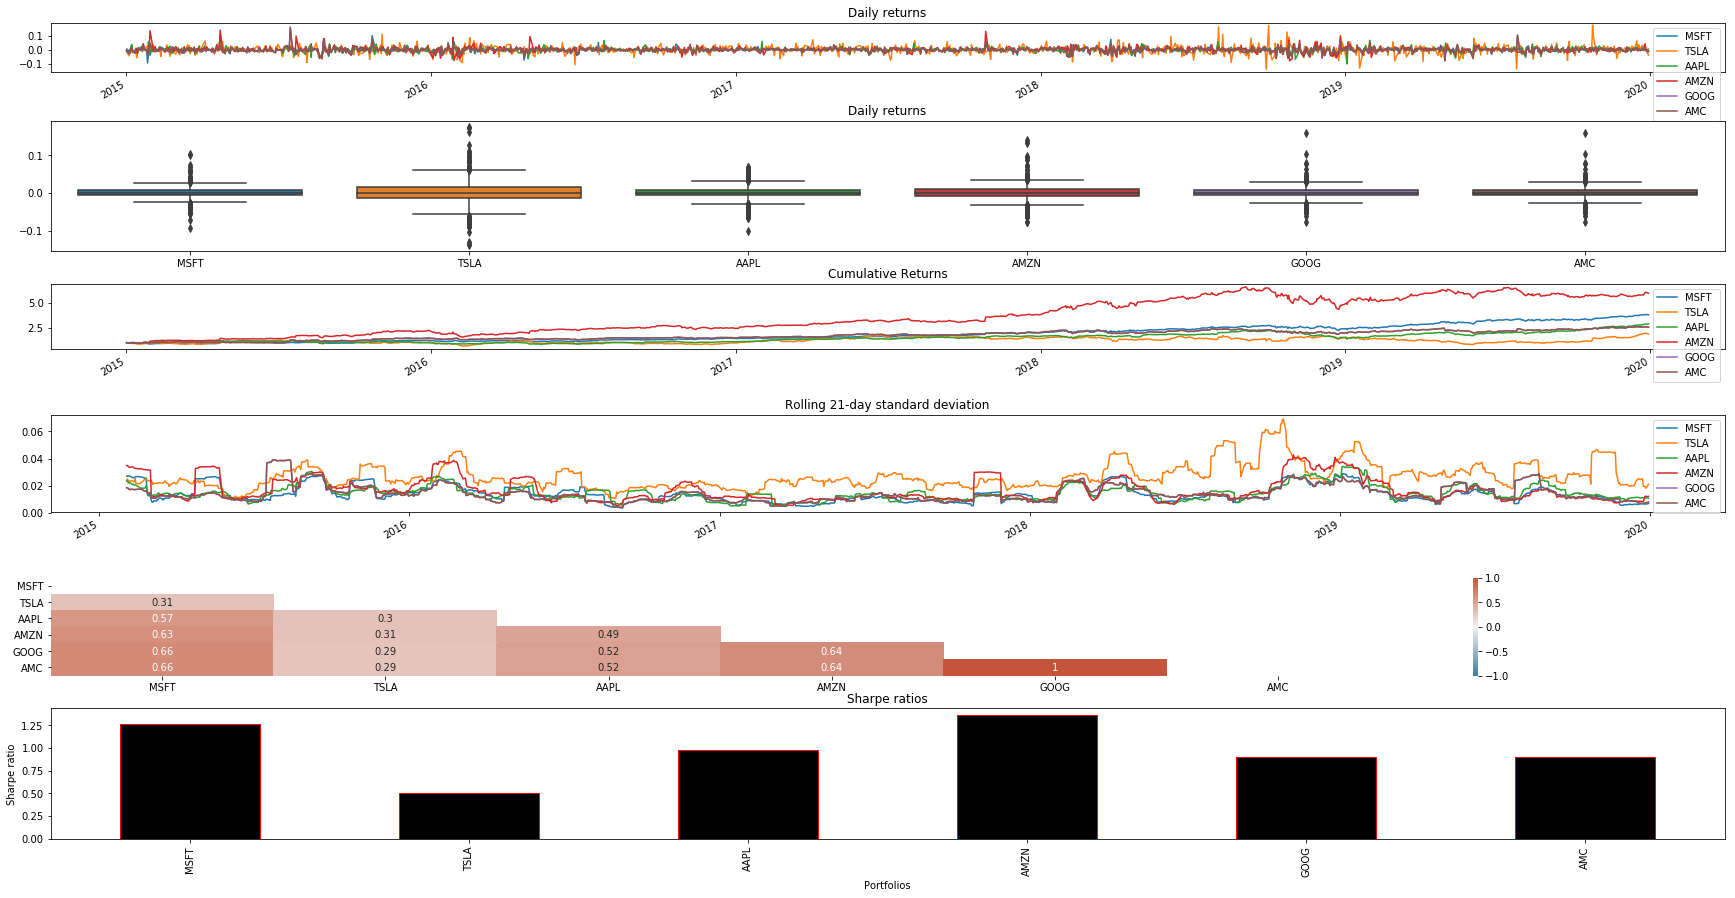

In [32]:
stocks = [MSFT_close, TSLA_close, AAPL_close, AMZN_close, GOOG_close, AMC_close]
weight = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

analyse_my_stock_portfolio2(stocks, weight)